<a href="https://colab.research.google.com/github/claragomes1/titanic_challenge/blob/main/tp_mineracao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP MINERAÇÃO DE DADOS [BCC-444] - LIMPEZA E TRANFORMAÇÃO DOS DADOS**


**Alunos:**

Michele Soares de Andrade - 20.1.4171

Gabriel Bruno Pereira Negri - 19.1.4976

Clara Lóris de Sales Gomes - 18.2.4004


**Desafio:** [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started/data)

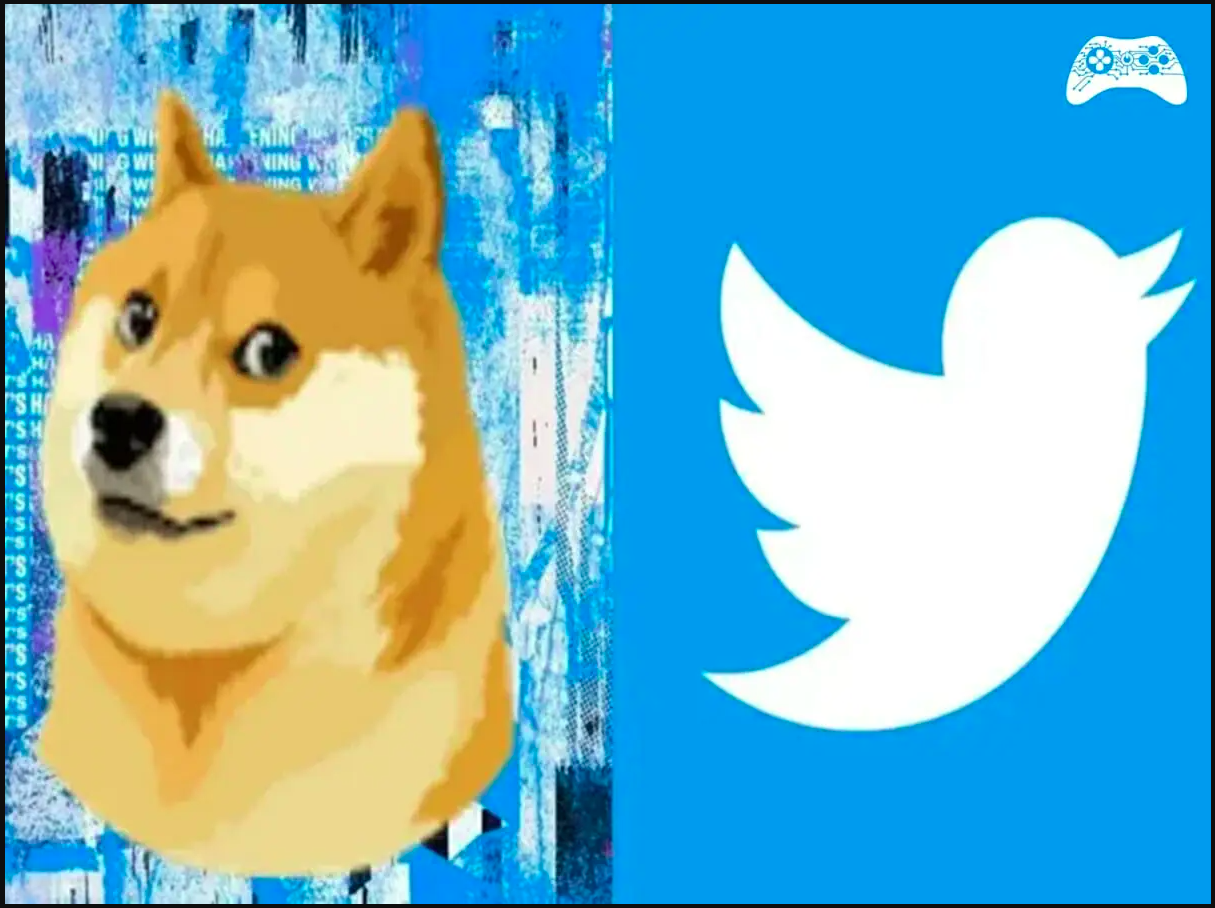

In [ ]:
!pip install -U mlxtend
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Leitura dos dados**

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('sample_submission.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Exploração inicial dos dados**

In [ ]:
train_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
print("Número de exemplos:", train_data.shape[0])
print("Número de atributos:", train_data.shape[1])

Número de exemplos: 7613
Número de atributos: 5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train_data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

**Análise dos tipos de atributos:**

**id**: Numérico (identificador único).

**keyword**: Categórico (texto representando a palavra-chave).

**location**: Categórico (texto representando a localização).

**text**: Texto (corpo do tweet).

**target**: Numérico (binário indicando se é um desastre real ou não).

O conjunto de dados possui várias colunas, sendo as principais: 'id', 'keyword', 'location', 'text' e 'target'. A coluna 'id' é um identificador único para cada tweet. A coluna 'keyword' contém palavras-chave relacionadas ao tweet. A coluna 'location' indica a localização do tweet (opcional). A coluna 'text' contém o conteúdo do tweet. A coluna 'target' é o atributo alvo, indicando se o tweet está relacionado a um desastre real (1) ou não (0).

In [ ]:
categorical_attributes = ['keyword', 'location']
for attribute in categorical_attributes:
    print("Contagem de valores para", attribute)
    print(train_data[attribute].value_counts())
    print()

Contagem de valores para keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Contagem de valores para location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# analisando valores ausentes
missing_values = train_data.isnull().sum()
print(missing_values)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# analisando valores inconsistentes
inconsistent_values = {}
for column in train_data.columns:
    unique_values = train_data[column].nunique()
    inconsistent_values[column] = unique_values

print(inconsistent_values)

{'id': 7613, 'keyword': 221, 'location': 3341, 'text': 7503, 'target': 2}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Pré processamento e transformação dos dados**

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

sentiment_words = ['not', 'never', 'no', 'none', 'neither', 'nor', 'but', 'however', 'although', 'though', 'yet', 'except',
                   'don\'t', 'doesn\'t', 'didn\'t', 'aren\'t', 'isn\'t', 'wasn\'t', 'weren\'t', 'can\'t', 'won\'t', 'shouldn\'t',
                   'wouldn\'t', 'couldn\'t', 'haven\'t', 'hasn\'t', 'hadn\'t', 'ain\'t']

def preprocess_tweet(tweet):
    # Remover caracteres especiais e links
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)

    # Tokenização
    tokens = word_tokenize(tweet)

    # Remover stopwords, exceto sentiment_words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words or token.lower() in sentiment_words]

    # Obter palavras removidas
    removed_words = [token for token in tokens if token.lower() in stop_words and token.lower() not in sentiment_words]

    return filtered_tokens, removed_words


processed_tweets = []
removed_words_list = []

for tweet in train_data['text']:
    processed_tweet, removed_words = preprocess_tweet(tweet)
    processed_tweets.append(processed_tweet)
    removed_words_list.append(removed_words)

train_data['processed_tweet'] = processed_tweets
train_data['removed_words'] = removed_words_list

print(train_data[['text', 'processed_tweet', 'removed_words']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                   text  \
0     Our Deeds are the Reason of this #earthquake M...   
1                Forest fire near La Ronge Sask. Canada   
2     All residents asked to 'shelter in place' are ...   
3     13,000 people receive #wildfires evacuation or...   
4     Just got sent this photo from Ruby #Alaska as ...   
...                                                 ...   
7608  Two giant cranes holding a bridge collapse int...   
7609  @aria_ahrary @TheTawniest The out of control w...   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   
7611  Police investigating after an e-bike collided ...   
7612  The Latest: More Homes Razed by Northern Calif...   

                                        processed_tweet  \
0     [Deeds, Reason, earthquake, May, ALLAH, Forgiv...   
1         [Forest, fire, near, La, Ronge, Sask, Canada]   
2     [residents, asked, shelter, place, notified, o...   
3     [13000, people, receive, wildfires, evacuation...

In [ ]:
print(train_data.isnull().sum())

id                    0
keyword              61
location           2533
text                  0
target                0
processed_tweet       0
removed_words         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Preencher os valores ausentes com um valor padrão
train_data['keyword'].fillna('N/A', inplace=True)
train_data['location'].fillna('N/A', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions = train_data['processed_tweet'].tolist()

# Aplicar a codificação one-hot nas transações
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No desafio, o objetivo é desenvolver um modelo para identificar se um tweet está relacionado a um desastre real ou não. Para isso, é essencial realizar o pré-processamento dos tweets antes de aplicar técnicas de análise de sentimento ou construir um modelo de classificação.

No pré-processamento, fizemos a remoção d caracteres especiais, links usando expressões regulares e stopwords, que são palavras comuns que geralmente não fornecem informações relevantes para a análise. Essas palavras podem incluir artigos, preposições, conjunções e outros termos frequentes na língua inglesa, como "the", "of", "is", "and", entre outros. A remoção de stopwords ajuda a reduzir o ruído e o tamanho do vocabulário, focando nas palavras mais significativas para a análise.

No entanto, em certos casos, palavras como "not", "never", "no", "none" e outras na lista de sentiment_words são importantes para capturar o sentimento expresso nos tweets. Essas palavras negativas ou de negação podem inverter o significado do tweet e indicar a presença de um desastre real. Por exemplo, o tweet "I am not feeling safe" contém a palavra negativa "not", que indica uma preocupação com a segurança e pode estar relacionada a um desastre real. Por esse motivo, preservamos essas palavras que são importantes nas análises de sentimento ao remover stopwords, para garantir que informações importantes não sejam perdidas.

E após a remoção das stopwords, restam as palavras nos tweets que podem ou não estar associadas a desastres.

Pré-processamento dos Dados:

Para o pré-processamento dos dados, aplicamos as seguintes etapas: Remoção de caracteres especiais e links usando expressões regulares. Tokenização dos tweets em palavras individuais. Remoção de stopwords (palavras comuns que não contribuem para o significado geral do texto).

Transformação dos Dados para a Associação:

Aplicar a codificação one-hot nas transações é um passo para trabalhar com dados categóricos em algoritmos de mineração de regras de associação, como o Apriori. A codificação one-hot é uma técnica que transforma os dados categóricos em uma representação binária, onde cada categoria é representada por uma coluna separada.
Em relação as de regras de associação, a codificação one-hot é utilizada para converter as transações, em uma matriz binária onde cada coluna representa um item e cada linha representa uma transação. Se um item está presente em uma transação, o valor correspondente na matriz é 1, caso contrário, é 0.

Transformação dos Dados para o Agrupamento:

Utilizamos o vetorizador TF-IDF para transformar as sequências de palavras pré-processadas em vetores numéricos. O vetorizador TF-IDF atribui pesos a cada palavra com base na sua frequência no tweet e na coleção de tweets como um todo. Em seguida, aplicamos o algoritmo de agrupamento K-means aos vetores TF-IDF. O K-means divide os tweets em um número específico de clusters, agrupando-os com base em sua similaridade.

In [ ]:
train_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,keyword,location,text,target,processed_tweet,removed_words
0,1,N/A,N/A,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[Our, are, the, of, this, all]"
1,4,N/A,N/A,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]",[]
2,5,N/A,N/A,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...","[All, to, in, are, being, by, other, or, in, are]"
3,6,N/A,N/A,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation...",[in]
4,7,N/A,N/A,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...","[Just, this, from, as, from, into, a]"
...,...,...,...,...,...,...,...
7608,10869,N/A,N/A,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, bridge, collapse...","[a, into]"
7609,10870,N/A,N/A,@aria_ahrary @TheTawniest The out of control w...,1,"[aria_ahrary, TheTawniest, control, wild, fire...","[The, out, of, in, in, the, of, the, Very]"
7610,10871,N/A,N/A,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M194, 0104, UTC5km, Volcano, Hawaii]","[S, of]"
7611,10872,N/A,N/A,Police investigating after an e-bike collided ...,1,"[Police, investigating, ebike, collided, car, ...","[after, an, with, a, in]"


# **Sumarização**

In [ ]:
# Estatísticas descritivas do atributo "text"
train_data['text_length'] = train_data['text'].apply(len)
text_length_stats = train_data['text_length'].describe()
print(text_length_stats)

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A análise descritiva do atributo "text_length" apresenta as seguintes informações:

**count**: O número total de instâncias no conjunto de dados é 7613.

**mean**: A média dos valores do atributo "text_length" é de aproximadamente 101.04.

**std**: O desvio padrão dos valores do atributo "text_length" é de aproximadamente 33.78. Isso indica a dispersão dos valores em relação à média.

**min**: O valor mínimo encontrado no atributo "text_length" é 7.

**25**%: O valor que representa o primeiro quartil (25º percentil) dos valores do atributo "text_length" é 78. Isso significa que 25% das instâncias têm um comprimento de texto inferior a 78 caracteres.

**50**%: O valor que representa o segundo quartil (50º percentil) dos valores do atributo "text_length" é 107. Esse valor é também conhecido como mediana e indica que metade das instâncias tem um comprimento de texto inferior a 107 caracteres.

**75**%: O valor que representa o terceiro quartil (75º percentil) dos valores do atributo "text_length" é 133. Isso significa que 75% das instâncias têm um comprimento de texto inferior a 133 caracteres.

**max**: O valor máximo encontrado no atributo "text_length" é 157.

Essas estatísticas descritivas fornecem uma visão geral do atributo "text_length". Podemos observar que a maioria dos textos possui um comprimento entre 78 e 133 caracteres, com uma média de cerca de 101 caracteres. Os valores mínimo e máximo indicam a faixa de variação do comprimento dos textos.

### **Visualização da distribuição dos comprimentos dos textos:**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


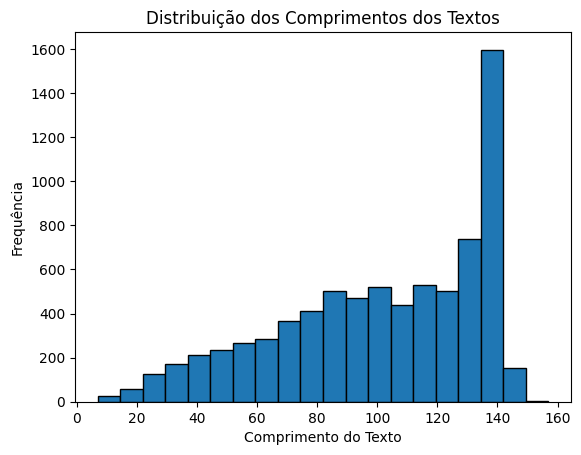

In [ ]:
plt.hist(train_data['text_length'], bins=20, edgecolor='black')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.title('Distribuição dos Comprimentos dos Textos')
plt.show()

### **Comparação entre os grupos de "target":**

In [ ]:
target_stats = train_data.groupby('target')['text_length'].describe()
print(target_stats)


         count        mean        std   min   25%    50%    75%    max
target                                                                
0       4342.0   95.706817  35.885924   7.0  68.0  101.0  130.0  157.0
1       3271.0  108.113421  29.309854  14.0  88.0  115.0  136.0  151.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Média**: A média do comprimento dos textos é maior no grupo com "target" igual a 1 (108.11 caracteres) em comparação com o grupo com "target" igual a 0 (95.71 caracteres). Isso sugere que, em média, os tweets relacionados a desastres tendem a ter um comprimento ligeiramente maior do que os tweets não relacionados a desastres.

**Desvio** **padrão**: O desvio padrão do comprimento dos textos é menor no grupo com "target" igual a 1 (29.31 caracteres) em comparação com o grupo com "target" igual a 0 (35.89 caracteres). Isso indica que os tweets relacionados a desastres apresentam uma menor dispersão em relação ao comprimento dos textos, ou seja, tendem a ser mais consistentes em termos de tamanho.

**Valores mínimo, máximo e percentis:** Observando os valores mínimo, máximo e os percentis (25%, 50% e 75%), podemos notar que, em geral, os tweets relacionados a desastres apresentam valores mais altos para esses indicadores em comparação com os tweets não relacionados a desastres. Isso sugere que os tweets relacionados a desastres tendem a ser mais longos em sua maioria.

Essa análise indica que o comprimento dos textos pode ser um fator relevante ou não na distinção entre tweets relacionados a desastres e tweets não relacionados a desastres. É necessário juntar essa analise com outros faores e verificar se tm relevância ou não. Isso será feito em próximas etapas.

### **Relação entre "text_length" e "keyword":**

In [ ]:
keyword_stats = train_data.groupby('keyword')['text_length'].mean()
print(keyword_stats)


keyword
N/A                     73.918033
ablaze                  94.694444
accident               100.085714
aftershock             101.205882
airplane%20accident    106.400000
                          ...    
wounded                111.054054
wounds                 103.363636
wreck                   88.540541
wreckage               122.256410
wrecked                 77.153846
Name: text_length, Length: 222, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Esses dados mostra a relação das palavras-chave e suas respectivas médias de comprimento de texto. A análise inclui todas as 221 palavras-chave presentes nos dados.

Essa análise pode fornecer informações interessantes sobre as palavras-chave e seus respectivos tamanhos médios de texto. Pode ajudar a identificar se certas palavras-chave estão associadas a tweets mais longos ou mais curtos. Essa informação pode ser útil para entender os padrões de comportamento dos usuários nas redes sociais durante eventos relacionados a desastres e para ajudar na classificação ou análise desses tweets com base em seu comprimento.

# **Associação**



In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Geração das regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.004, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.006)

# Exibir as regras de associação
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             antecedents           consequents  antecedent support  \
0                 (Body)               (Cross)            0.005648   
1                (Cross)                (Body)            0.004991   
2             (Northern)          (California)            0.007881   
3           (California)            (Northern)            0.014712   
4         (Legionnaires)            (outbreak)            0.005254   
5             (outbreak)        (Legionnaires)            0.004597   
6             (Malaysia)               (MH370)            0.006436   
7                (MH370)            (Malaysia)            0.009063   
8                (liked)             (YouTube)            0.005780   
9              (YouTube)               (liked)            0.012085   
10             (YouTube)               (video)            0.012085   
11               (video)             (YouTube)            0.013529   
12                (bomb)             (suicide)            0.011165   
13             (suic

**O que é regra de associação?**

Regra de associação é um conceito importante na mineração de dados, que busca descobrir padrões interessantes e relacionamentos entre itens em conjuntos de dados. Essas regras ajudam a identificar associações entre diferentes itens ou variáveis.  Essas regras são medidas por métricas como:

Suporte: indica a frequência com que um conjunto de itens aparece no conjunto Suporte: O suporte é uma medida de frequência que indica a proporção de transações que contêm um determinado item ou conjunto de itens. Por exemplo, o suporte de "(Body)" é de aproximadamente 0,0056, o que significa que cerca de 0,56% das transações contêm o item "Body". O suporte pode ser usado para identificar os itens mais frequentes nas transações.

Confiança: A confiança é uma medida de probabilidade condicional que indica a probabilidade de ocorrer um item consequente dado o item antecedente. Por exemplo, a confiança de "(Body) -> (Cross)" é de aproximadamente 0,744, o que significa que em cerca de 74,4% das transações em que "Body" está presente, "Cross" também está presente. A confiança pode ser usada para identificar associações entre os itens.

Lift: O lift é uma medida de associação que indica o quão mais provável é a ocorrência de um item consequente dado o item antecedente, em comparação com a ocorrência aleatória. Um valor de lift maior que 1 indica uma associação positiva entre os itens, enquanto um valor menor que 1 indica uma associação negativa. Por exemplo, o lift de "(Body) -> (Cross)" é de aproximadamente 149, o que significa que a ocorrência de "Body" aumenta 149 vezes a probabilidade de ocorrer "Cross". O lift pode ser usado para identificar as associações mais fortes entre os itens.

Leverage: O leverage é uma medida de quão longe a ocorrência real de um item consequente está da ocorrência aleatória. Valores positivos de leverage indicam uma associação positiva, enquanto valores negativos indicam uma associação negativa. Quanto maior o valor absoluto do leverage, maior é a desvio da ocorrência real em relação à ocorrência aleatória. Por exemplo, o leverage de "(Body) -> (Cross)" é de aproximadamente 0,0042, o que indica que a ocorrência real desses itens é 0,42% maior do que o esperado ao acaso.

Conviction: A conviction é uma medida de dependência entre os itens antecedentes e consequentes. Valores altos de conviction indicam uma dependência forte entre os itens, enquanto valores próximos de 1 indicam independência. Por exemplo, a conviction de "(Liked) -> (YouTube)" é de aproximadamente 21,7, o que indica uma forte dependência entre "Liked" e "YouTube". A conviction pode ser usada para identificar relações de dependência entre os itens.

**Analise dos resultados obtidos**

Associação: (Legionnaires) -> (outbreak)

Suporte do antecedente: 0.005254
Suporte do consequente: 0.004597
Suporte do antecedente e consequente: 0.004335
Confiança: 0.825000
Lift: 179.449286
Leverage: 0.004311
Conviction: 5.688015
Zhang's metric: 0.999020
Análise: A associação entre "Legionnaires (legionários)" e "outbreak (surto)" tem um suporte relativamente baixo, mas uma confiança alta de 82.50%. Isso indica que a presença de "Legionnaires" aumenta substancialmente a probabilidade de ocorrer um "outbreak". O lift de 179.449286 indica uma forte correlação entre esses dois itens, sugerindo que eles ocorrem juntos com muita frequência. O valor da métrica de Zhang de 0.999020 confirma a significância estatística dessa associação.

Associação: (MH370) -> (Malaysia)

Suporte do antecedente: 0.009063
Suporte do consequente: 0.006436
Suporte do antecedente e consequente: 0.005780
Confiança: 0.637681
Lift: 99.074830
Leverage: 0.005721
Conviction: 2.742236
Zhang's metric: 0.998961
Análise: A associação entre "MH370" e "Malaysia" tem um suporte relativamente alto. A confiança de 63.77% indica que a presença de "MH370" está relacionada a uma alta probabilidade de ocorrer "Malaysia". O lift de 99.074830 sugere uma forte correlação entre esses dois itens, indicando que a ocorrência de "MH370" aumenta significativamente a probabilidade de "Malaysia". O valor da métrica de Zhang de 0.998961 indica que essa associação é estatisticamente significante. Essa associação é referente a tweets sobre o desastre aero MH370.

Associação: (bomber) -> (detonated)

Suporte do antecedente: 0.006215
Suporte do consequente: 0.004765
Suporte do antecedente e consequente: 0.004509
Confiança: 0.724638
Lift: 152.009023
Leverage: 0.004483
Conviction: 3.272161
Zhang's metric: 0.998601
Análise: A associação entre "bomber" e "detonated" tem um suporte relativamente baixo, mas uma confiança alta de 72.46%. Isso indica que a presença de "bomber" aumenta substancialmente a probabilidade de "detonated" ocorrer. O lift de 152.009023 indica uma forte correlação entre esses dois itens, sugerindo que eles ocorrem juntos com muita frequência. O valor da métrica de Zhang de 0.998601 confirma a significância estatística dessa associação.

Associação: (suicide) -> (bomb)

Suporte do antecedente: 0.008905
Suporte do consequente: 0.010450
Suporte do antecedente e consequente: 0.008855
Confiança: 0.994400
Lift: 95.198430
Leverage: 0.008664
Conviction: 160.536214
Zhang's metric: 0.999745
Análise: A associação entre "suicide" e "bomb" tem um suporte relativamente alto. A confiança de 99.44% indica que a presença de "suicide" está fortemente ligada à ocorrência de "bomb". O lift de 95.198430 sugere uma forte correlação entre esses dois itens, indicando que a presença de "suicide" aumenta significativamente a probabilidade de ocorrer "bomb". O valor da métrica de Zhang de 0.999745 confirma a significância estatística dessa associação.

Associação: (burning) -> (buildings)

Suporte do antecedente: 0.005412
Suporte do consequente: 0.008742
Suporte do antecedente e consequente: 0.005105
Confiança: 0.943089
Lift: 107.894244
Leverage: 0.005020
Conviction: 25.329023
Zhang's metric: 0.999407
Análise: A associação entre "burning" e "buildings" tem um suporte relativamente baixo, mas uma confiança alta de 94.30%. Isso indica que a presença de "burning" está fortemente relacionada à ocorrência de "buildings". O lift de 107.894244 sugere uma forte correlação entre esses dois itens, indicando que a presença de "burning" aumenta significativamente a probabilidade de ocorrer "buildings". O valor da métrica de Zhang de 0.999407 confirma a significância estatística dessa associação.

Associação: (structural) -> (failure)

Suporte do antecedente: 0.006712
Suporte do consequente: 0.007789
Suporte do antecedente e consequente: 0.006560
Confiança: 0.976736
Lift: 125.485295
Leverage: 0.006472
Conviction: 61.199062
Zhang's metric: 0.999142
Análise: A associação entre "structural" e "failure" tem um suporte moderado, com uma confiança alta de 97.67%. Isso indica que a presença de "structural" está fortemente relacionada à ocorrência de "failure". O lift de 125.485295 sugere uma correlação significativa entre esses dois itens, indicando que a presença de "structural" aumenta substancialmente a probabilidade de ocorrer "failure". O valor da métrica de Zhang de 0.999142 confirma a significância estatística dessa associação.

Associação: (bomber, suicide) -> (detonated)

Suporte do antecedente: 0.003697
Suporte do consequente: 0.004424
Suporte do antecedente e consequente: 0.003426
Confiança: 0.928443
Lift: 209.868579
Leverage: 0.003408
Conviction: 30.625648
Zhang's metric: 0.998193
Análise: A associação entre "bomber, suicide" e "detonated" tem um suporte relativamente baixo, mas uma confiança alta de 92.84%. Isso indica que a presença de "bomber" e "suicide" juntos está fortemente ligada à ocorrência de "detonated". O lift de 209.868579 sugere uma forte correlação entre esses itens, indicando que a presença de "bomber" e "suicide" aumenta significativamente a probabilidade de ocorrer "detonated". O valor da métrica de Zhang de 0.998193 confirma a significância estatística dessa associação.

# **Padrões** **de** **Sequência**


In [ ]:
sequences = train_data['processed_tweet'].tolist()

print(sequences[:5])


[['Deeds', 'Reason', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us'], ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada'], ['residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'No', 'evacuation', 'shelter', 'place', 'orders', 'expected'], ['13000', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'California'], ['got', 'sent', 'photo', 'Ruby', 'Alaska', 'smoke', 'wildfires', 'pours', 'school']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Algoritmo Apriori**

In [ ]:
!pip install pymining

from pymining import seqmining

formatted_sequences = [tuple(sequence) for sequence in sequences]

min_support = 50
frequent_sequences = seqmining.freq_seq_enum(formatted_sequences, min_support)

for sequence, support in frequent_sequences:
    print(sequence, support)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
('Û_',) 59
('work',) 55
('see',) 84
('many',) 68
('year',) 63
('PM',) 57
('much',) 57
('first',) 66
('Im',) 215
('New',) 101
('got',) 110
('police',) 75
('crash',) 78
('think',) 77
('getting',) 50
('today',) 67
('help',) 55
('na',) 71
('last',) 67
('YouTube',) 92
('Hiroshima',) 84
('burning', 'buildings') 52
('u',) 53
('train',) 69
('old',) 55
('5',) 62
('new',) 105
('know',) 102
('make',) 56
('mass',) 59
('back',) 93
('4',) 66
('even',) 61
('2',) 148
('war',) 56
('bombing',) 60
('said',) 56
('people',) 160
('Army',) 50
('get',) 179
('accident',) 57
('News',) 108
('killed',) 89
('disaster',) 100
('RT',) 102
('suicide',) 76
('California',) 112
('time',) 92
('fires',) 86
('really',) 59
('hot',) 53
('bomber',) 53
('2015',) 59
('one',) 146
('attack',) 74
('fatal',) 58
('could',) 63
('feel',) 52
('storm',) 71
('going',) 92
('Police',) 58
('dont',) 140
('love',) 66
('video',) 103
('emergency',)

### **Análise** **dos** **termos** **frequentes**

Ao analisar os termos frequentes, é possível identificar algumas tendências e padrões que podem ajudar na construção de um modelo de aprendizado de máquina para prever se os Tweets são sobre desastres reais ou não. Aqui estão algumas observações:

**Palavras relacionadas a desastres:** Termos como "killed" (mortos), "attack" (ataque), "collapse" (colapso), "bomb" (bomba), "fire" (incêndio) e "disaster" (desastre) indicam a presença de eventos catastróficos. Essas palavras podem ser úteis para identificar Tweets relacionados a desastres reais.

**Referências a notícias e mídia:** Termos como "news" (notícias), "YouTube", "RT" (retweet) e "video" sugerem que o conteúdo do Tweet pode estar relacionado a informações ou mídia divulgadas sobre eventos de desastre. Essas palavras podem indicar a relevância do Tweet para o tema em questão.

**Localização geográfica:** Termos como "California" e "Hiroshima" podem indicar eventos específicos relacionados a essas localidades. Ao considerar a análise de desastres reais, a identificação de informações geográficas relevantes pode ser útil.

**Ação e necessidade de ajuda:** Termos como "help" (ajuda), "need" (precisar), "emergency" (emergência) e "families" (famílias) podem indicar uma situação de urgência e a necessidade de assistência. Essas palavras podem estar associadas a Tweets sobre desastres reais.

**Referências a eventos passados:** Termos como "2015" e "MH370" podem indicar referências a eventos de desastre ocorridos anteriormente. Essas palavras podem fornecer contexto histórico e relevância para a análise de desastres.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


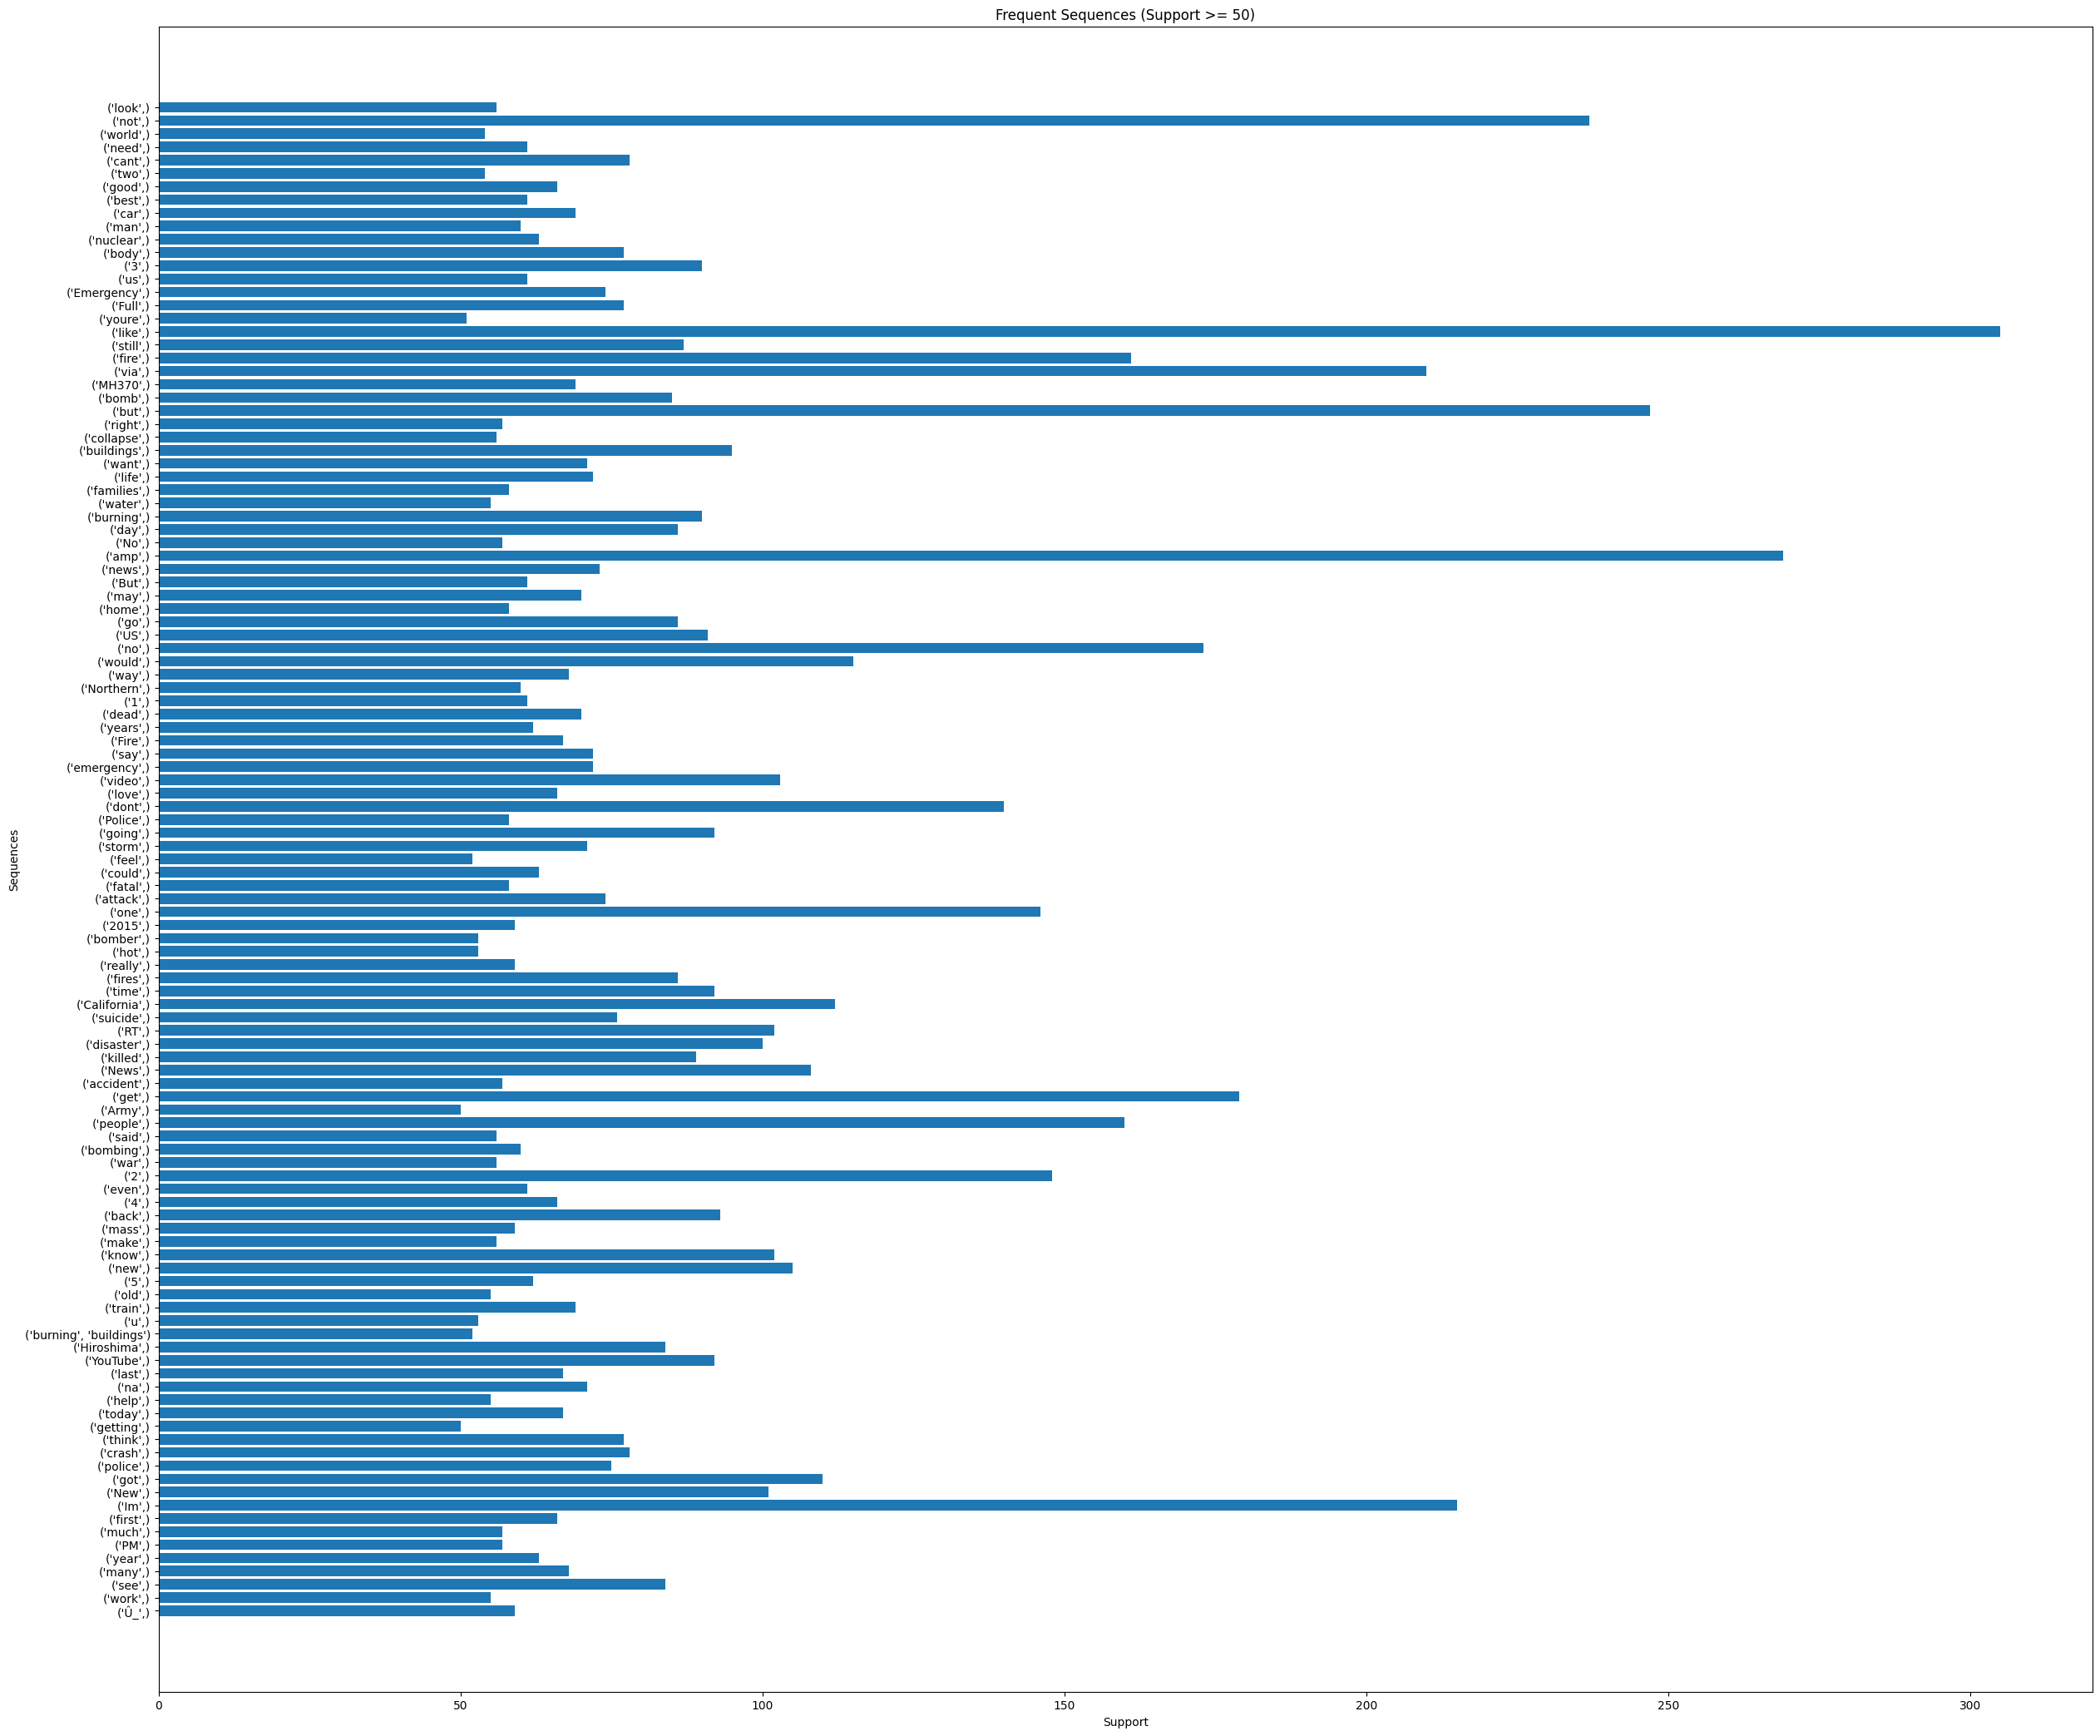

In [ ]:
# Definir um suporte mínimo
min_support = 50

# Filtrar as sequências com suporte acima do mínimo
filtered_sequences = [sequence for sequence, support in frequent_sequences if support >= min_support]
filtered_supports = [support for sequence, support in frequent_sequences if support >= min_support]

# Criar um gráfico de barras das sequências frequentes filtradas
plt.figure(figsize=(30, 26))
plt.barh(range(len(filtered_sequences)), filtered_supports, align='center')
plt.yticks(range(len(filtered_sequences)), filtered_sequences)
plt.xlabel('Support')
plt.ylabel('Sequences')
plt.title(f'Frequent Sequences (Support >= {min_support})')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


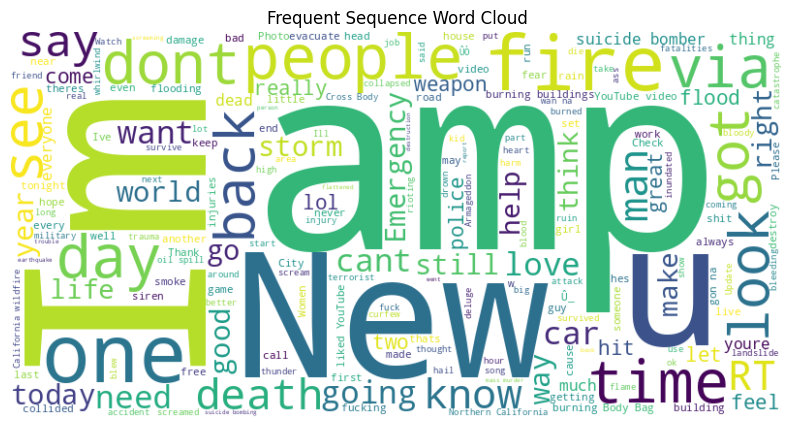

In [ ]:
from wordcloud import WordCloud

# Converter as sequências em strings
formatted_sequences = [' '.join(sequence) for sequence in sequences]

# Concatenar todas as sequências em um único texto
text = ' '.join(formatted_sequences)

# Criar uma nuvem de palavras das sequências frequentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Sequence Word Cloud')
plt.show()



# **Agrupamento**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


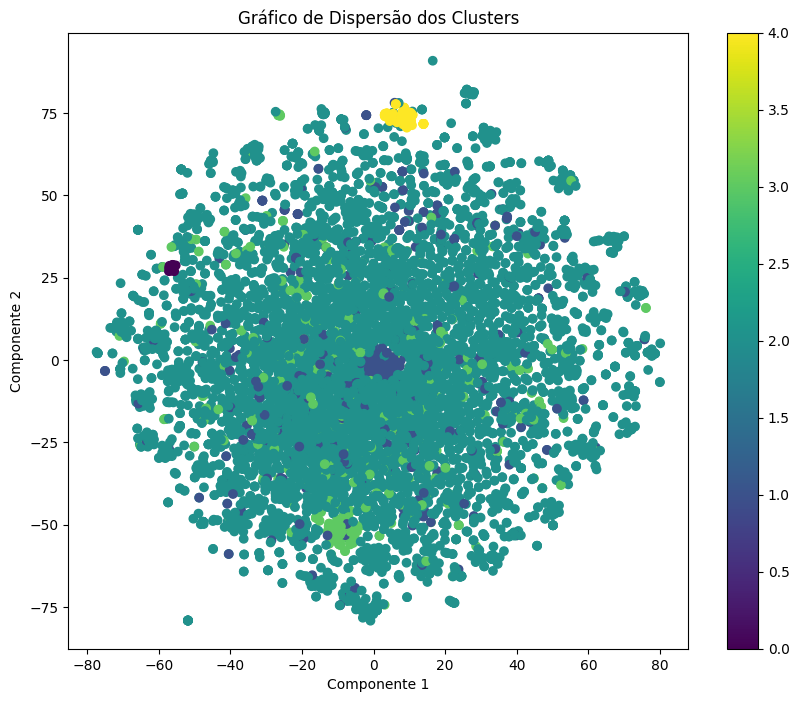

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Inicializar o vetorizador TF-IDF
vectorizer = TfidfVectorizer()

# Vetorizar as sequências de palavras pré-processadas
X = vectorizer.fit_transform(formatted_sequences)

# Definir o número de clusters
n_clusters = 5

# Inicializar o algoritmo de agrupamento K-means
kmeans = KMeans(n_clusters=n_clusters)

# Executar o agrupamento
kmeans.fit(X)

# Adicionar as informações do cluster ao DataFrame de treinamento
train_data['cluster'] = kmeans.labels_

# Reduzir a dimensionalidade dos dados para 2D usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plotar o gráfico de dispersão dos clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.colorbar()
plt.title('Gráfico de Dispersão dos Clusters')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


Transformação dos Dados para o Agrupamento:

Utilizamos o vetorizador TF-IDF para transformar as sequências de palavras pré-processadas em vetores numéricos. O vetorizador TF-IDF atribui pesos a cada palavra com base na sua frequência no tweet e na coleção de tweets como um todo. Em seguida, aplicamos o algoritmo de agrupamento K-means aos vetores TF-IDF. O K-means divide os tweets em um número específico de clusters, agrupando-os com base em sua similaridade.

A utilização de clusters pode contribuir para resolver o problema de algumas formas como:

Exploração de padrões: Ao agrupar os tweets em clusters, podemos explorar os padrões presentes nos dados. Isso pode nos ajudar a identificar grupos de tweets que compartilham características semelhantes e entender melhor as diferentes categorias de tweets relacionados a desastres. Essa exploração de padrões pode fornecer insights valiosos sobre os tipos de palavras, tópicos ou contexto que podem estar associados a desastres reais.

Análise exploratória: A análise dos clusters formados pode fornecer uma visão geral dos diferentes grupos de tweets. Podemos visualizar as características mais frequentes em cada cluster, como palavras-chave, frases comuns ou tópicos recorrentes. Isso nos ajuda a entender melhor a distribuição dos tweets relacionados a desastres e identificar as principais tendências ou temas abordados em cada cluster.

Aprendizado não supervisionado: O uso de agrupamento permite uma abordagem de aprendizado não supervisionado para analisar os tweets. Isso significa que não precisamos de rótulos predefinidos para realizar a classificação. Em vez disso, os clusters são formados com base nas características dos próprios dados, permitindo que o algoritmo descubra naturalmente os padrões e similaridades nos tweets.

Detecção de novidades: Os clusters também podem ser usados para detectar tweets que não se encaixam em nenhum grupo existente. Esses tweets podem representar casos incomuns, outliers ou até mesmo informações novas e relevantes sobre desastres que ainda não foram identificadas. Identificar esses tweets pode ajudar a descobrir informações únicas e importantes para o problema em questão.

Melhoria da classificação: Os clusters podem ser usados como recursos adicionais para melhorar a classificação dos tweets relacionados a desastres. Por exemplo, podemos atribuir rótulos de cluster aos tweets não rotulados e usar essa informação como entrada adicional em um modelo de classificação supervisionada. Isso pode ajudar a melhorar a precisão do modelo e a capturar nuances e contextos específicos presentes nos diferentes grupos de tweets.